---
# **Section I: Introduction to the problem/task and dataset**

### **Introduction to the Task**
The primary objective of this project is to predict the likelihood of additional goals in a soccer match based on real-time in-game statistics, with the aim of supporting decision-making in sports trading (e.g., over/under betting). By analyzing game-specific metrics, we can estimate scoring potential and influence live trading models for betting and fan engagement.

### **Dataset Overview**
This project’s dataset includes 10,000 unique snapshots of soccer matches at various timestamps, capturing the state of a game through different in-game metrics. Each snapshot includes details on the current score, possession percentages, attempts, and cards, providing a rich dataset for building predictive models.


### **Problem Motivation**
The practical application of predicting match outcomes from live data is significant for team strategy and sports betting, as knowing influential factors—such as possession and dangerous attacks—can improve decision-making and potentially impact match strategies (Kuhn & Johnson, 2013).

---


# **Section 2: Description of the dataset**

### Dataset Overview
The dataset consists of 10,000 randomly selected snapshots from soccer matches, each capturing the in-game state at a specific timestamp. Each row represents a snapshot, detailing scores, possession, and other match features, which collectively provide a momentary overview of game dynamics (Anguera et al., 2018).

### Data Collection
This dataset was collected through in-game analytics systems that continuously monitor and record essential match metrics. Although highly detailed, this collection method might introduce minor noise due to the rapid state changes inherent in live sports (Yin & Leong, 2017).

### Dataset Structure 
- **Rows**: Each row represents a single timestamp during a soccer match.
- **Columns**: Key features include:
  - **Identifier**: `uuid` - Unique identifier for each snapshot.
  - **Time**: `current_minute` - Game minute, including a 15-minute half-time, making the total match time 105 minutes.
  - **Scores**: `home_score`, `away_score`
  - **Cards**: Yellow and red cards for both teams.
  - **Gameplay Metrics**: Attacks, dangerous attacks, and shots on/off target for each team.
  - **Possession**: Ball possession percentages for each team.
  - **Target**: `final_delta` - The number of goals scored by any team. The target value for the prediction.

---


# **Section 3: List of requirements**

### Python Libraries


> Add more if may gagamitin pa


The following libraries are required to support data analysis, model training, and evaluation:
- **Data Manipulation**:
  - `pandas`: Data manipulation and cleaning (McKinney, 2011).
  - `numpy`: Numerical operations (Oliphant, 2006).
- **Data Visualization**:
  - `matplotlib`: For line and bar charts (Hunter, 2007).
  - `seaborn`: For statistical graphics (Waskom, 2021).
- **Machine Learning and Model Evaluation**:
  - `scikit-learn`: For k-NN, Linear Regression, Neural Networks, and model validation (Pedregosa et al., 2011).
  - 
- **Hyperparameter Tuning**:
  - `scikit-learn`: For grid search and random search.
- **Metrics**:
  - `scikit-learn.metrics`: 


In [44]:
# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error ,r2_score

#data cleaning and preprocessing
import numpy as np
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error ,r2_score

from random_forest_util import tune_random_forest
from random_forest_util import print_RF
from random_forest_util import plot_learning_curve


from random_forest_util import tune_random_forest, print_RF, plot_learning_curve


plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'



In [45]:
np.random.seed(42)

# **Section 4: Data preprocessing and cleaning**

#### Cleaning Steps
- **Checking for Duplicates**: Removing redundant rows to ensure unique snapshots.
- **Type Conversion**: Ensuring all features are in suitable formats (e.g., integer for score-related features, float for percentages).
- **Handling Missing Values**: Uses techniques like imputation if necessary, based on the dataset's nature.
- **Outlier Detection**: Detects anomalies in numerical features, which may skew predictions if left unaddressed.

#### Preprocessing Techniques
Key techniques include:
- **Feature Scaling**: Since features have different units (e.g., score vs. possession percentage), scaling is essential to ensure model performance, particularly for k-NN and Neural Networks (Han et al., 2011).

### **I. Load and Inspect the Data**
- Initial Check: Start by inspecting the data types, missing values, and unique values. This helps determine what cleaning actions are necessary (Han et al., 2011).
- Data Types: Confirm the data types for each column, ensuring numerical values are correctly identified for calculations and models.


In [46]:
df = pd.read_csv('sports.csv', index_col="uuid")
df.head()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
uuid,,,,,,,,,,,,,,,,,,,,
2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,29,26,4,1,4,0,4,6,48,52,1
869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,50,1
549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,62,38,4
287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,11,25,1,0,0,2,0,0,55,45,2
a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,21,46,1,1,0,3,4,4,45,55,0


In [47]:
df = df.reset_index(col_level=0)
df = df.drop('uuid', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   current_minute          7000 non-null   int64
 1   home_score              7000 non-null   int64
 2   away_score              7000 non-null   int64
 3   home_yellow_cards       7000 non-null   int64
 4   away_yellow_cards       7000 non-null   int64
 5   home_red_cards          7000 non-null   int64
 6   away_red_cards          7000 non-null   int64
 7   home_attacks            7000 non-null   int64
 8   away_attacks            7000 non-null   int64
 9   home_dangerous_attacks  7000 non-null   int64
 10  away_dangerous_attacks  7000 non-null   int64
 11  home_corners            7000 non-null   int64
 12  away_corners            7000 non-null   int64
 13  home_off_target         7000 non-null   int64
 14  away_off_target         7000 non-null   int64
 15  home_on_target       

In [48]:
# Statistical Summaries of All Feature 
df.agg(['min', 'max', 'median', 'mean']).T

,min,max,median,mean
current_minute,-348.0,583.0,70.0,59.491571
home_score,0.0,8.0,0.0,0.796000
away_score,0.0,9.0,0.0,0.623143
home_yellow_cards,0.0,8.0,0.0,0.522429
away_yellow_cards,0.0,8.0,0.0,0.603143
home_red_cards,0.0,2.0,0.0,0.009286
away_red_cards,0.0,2.0,0.0,0.015714
home_attacks,0.0,255.0,43.0,46.365429
away_attacks,0.0,183.0,41.0,43.325143
home_dangerous_attacks,0.0,134.0,25.0,27.611429


#### Check ranges of values for each feature to determine invalid / unrealistic values

### II. Remove Unrealistic Values and Outliers
- Current Minute: Limit values between 0 and 105 (including a 90-minute match plus 15 minutes for half-time).
- Yellow Cards: Set a threshold of 5 yellow cards per team, as higher values are rare.
Attacks and Dangerous Attacks: Apply upper bounds of 150 for attacks and 100 for dangerous attacks, considering typical gameplay stats.
`may citation ba 2 / src?`

- Possession Percentages: Filter for rows where the sum of home_possession and away_possession is close to 100%, with a tolerance of ±2% to give way for rounding discrepancies

- final_delta: Filter out negative values, since goals should be a nonnegative value

In [49]:
# Filter for realistic match time
df = df[(df['current_minute'] >= 0) & (df['current_minute'] <= 105)]

# Limit yellow cards to realistic maximum
df = df[(df['home_yellow_cards'] <= 5) & (df['away_yellow_cards'] <= 5)]

# Limit attacks and dangerous attacks
df = df[(df['home_attacks'] <= 150) & (df['away_attacks'] <= 150)]
df = df[(df['home_dangerous_attacks'] <= 100) & (df['away_dangerous_attacks'] <= 100)]

# Check possession totals with a tolerance
df = df[np.isclose(df['home_possession'] + df['away_possession'], 100, atol=5)]


In [50]:
# Only include rows with nonnegative final_delta
df_len = len(df)
print(f'Number of rows: {df_len}')
df = df.drop(df[df['final_delta'] < 0].index)
print(f'After dropping: {len(df)} (-{df_len- len(df)})')

df['final_delta']=df['final_delta'].apply(lambda x: 5 if x >= 5 else x)

Number of rows: 6732
After dropping: 6729 (-3)


In [51]:
dupes = df.duplicated().sum()
print(f'Number of duplicate rows: {dupes}')

df_w_dupes = len(df)
df = df.drop_duplicates()

print(f'After dropping: {len(df)} (-{df_w_dupes- len(df)})')

Number of duplicate rows: 108
After dropping: 6621 (-108)


### **III. Normalize Features**
- For `current_minute`, disregard half-time break of 15 minutes since the snapshot does not change within this period

In [52]:
# if current_minute in (45,60) then set to 45 (currently on break)
# if current_minute > 60, subtract by 15

original_minutes = df['current_minute'].copy()

df['current_minute'] = df['current_minute'].apply(
    lambda x: 45 if x in [45, 60] else (x - 15 if x > 60 else x)
)

# Count the number of rows affected
rows_affected = (df['current_minute'] != original_minutes).sum()
print(f'Number of rows affected: {rows_affected}')

Number of rows affected: 3749


### **IV. Feature Engineering**
- In this section, we're creating new features to make our predictions better. These features help us understand the game mechanics more deeply and improve our model's accuracy.
### New Features:
- **Goal Difference**:
  - *What it is*: The difference in the number of goals scored by the home team and the away team. This helps us see which team is leading.
  - *Why it's useful*: Knowing who is ahead can be crucial for predicting the match outcome.
- **Attack Efficiency**:
  - *What it is*: This shows how well a team turns their attacks into shots on target. It's calculated by dividing the number of on-target shots by the total number of shots (on target + off target).
  - *Why it's useful*: Teams that are good at this usually have a better chance of scoring goals.
- **Possession Balance**:
  - *What it is*: The difference between the possession percentages of the home team and the away team. It shows which team is controlling the game.
  - *Why it's useful*: The team with more possession often dictates the game's pace and strategy.
#### Why These Matter:
By adding these features, we hope to give our models more valuable information that can lead to more accurate predictions. This helps in making smarter decisions for things like sports betting and understanding game strategies better.


In [53]:
# Create engineered features
df['goal_difference'] = df['home_score'] - df['away_score'] 
df['home_attack_efficiency'] = df['home_on_target'] / (df['home_on_target'] + df['home_off_target'] + 1e-5)
df['away_attack_efficiency'] = df['away_on_target'] / (df['away_on_target'] + df['away_off_target'] + 1e-5)
df['possession_balance'] = df['home_possession'] - df['away_possession']

# df = df.drop(["home_score", "away_score", 
#               "home_on_target", "away_on_target",
#               "home_off_target","away_off_target", 
#               "home_possession", "away_possession"], 
#               axis=1)

### **Final Validation**

In this section, we make sure our data is ready to be used for building models. We perform a few checks to ensure everything is in order.

#### Steps in Final Validation:

- **Data Type Validation**:
  - *What it is*: We check that each feature (column) in our data is of the correct type (either a number or a floating-point number).
  - *Why it's useful*: Correct data types help in proper calculations and avoid errors during model training.

- **Feature Correlation**:
  - *What it is*: We calculate how closely each feature in our data is related to others. This helps us identify any features that are too similar.
  - *Why it's useful*: Having features that are too similar can sometimes confuse models. By knowing correlations, we can decide if some features should be removed or combined.

#### Outcome:
- **Data Structure**: We ensure the data structure is sound and all features are correctly formatted.
- **Correlations**: By examining correlations, we gather insights on which features impact the predictions the most. Highly correlated features might need attention, as they could affect model performance.

Performing these checks helps us confirm that our data is clean and correctly structured for the best possible model performance.


In [54]:

# Statistical Summaries of All Feature 
df.agg(['min', 'max', 'median', 'mean']).T

,min,max,median,mean
current_minute,0.0,90.000000,54.000000,49.621507
home_score,0.0,8.000000,0.000000,0.780396
away_score,0.0,9.000000,0.000000,0.608518
home_yellow_cards,0.0,5.000000,0.000000,0.497961
away_yellow_cards,0.0,5.000000,0.000000,0.573478
home_red_cards,0.0,2.000000,0.000000,0.008609
away_red_cards,0.0,2.000000,0.000000,0.014348
home_attacks,0.0,150.000000,43.000000,45.158737
away_attacks,0.0,148.000000,40.000000,42.477571
home_dangerous_attacks,0.0,100.000000,24.000000,26.840659


In [55]:
print(f"Final shape: {df.shape}")
df.head()

Final shape: (6621, 24)


,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,...,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta,goal_difference,home_attack_efficiency,away_attack_efficiency,possession_balance
0,79,1,2,0,0,0,0,39,45,29,...,0,4,6,48,52,1,-1,0.499999,0.999998,-4
1,76,2,0,0,0,0,0,0,0,0,...,0,0,0,50,50,1,2,0.000000,0.000000,0
2,3,0,0,0,0,0,0,3,1,1,...,0,0,0,62,38,4,0,0.000000,0.000000,24
3,17,0,0,1,0,0,0,41,46,11,...,2,0,0,55,45,2,0,0.000000,0.000000,10
4,61,1,0,1,0,0,0,69,78,21,...,3,4,4,45,55,0,1,0.999998,0.571428,-10


`[will fix this pa wait]`

References:
Aggarwal, C. C. (2017). Outlier analysis. Springer International Publishing. 
Han, J., Kamber, M., & Pei, J. (2011). Data mining: Concepts and techniques. Elsevier.
Jain, A., & Zongker, D. (1997). Feature selection: Evaluation, application, and small sample performance. IEEE Transactions on Pattern Analysis and Machine Intelligence, 19(2), 153-158.
Kang, H. (2013). The prevention and handling of the missing data. Korean Journal of Anesthesiology, 64(5), 402-406.
Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. Springer.
Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.


---

# **Section 5: Exploratory data analysis**

### **Feature Correlation with Target**

In this section, we explore how each feature relates to the target value, `final_delta`. By examining these correlations, we can understand which features might be significant in predicting the outcome.

- **Insight**: Features with high positive or negative correlations are potentially more influential and may play a significant role in our predictive models.

/var/folders/rj/0jvgc53d6kl4sq10wzq0rvbh0000gn/T/ipykernel_68664/3642682513.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


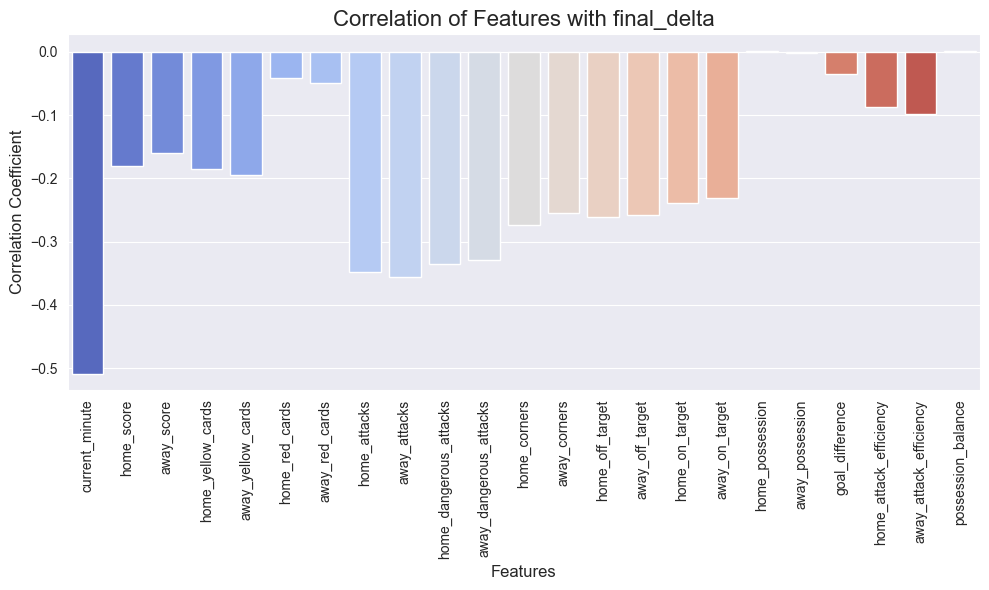

current_minute           -0.508876
home_score               -0.180326
away_score               -0.159346
home_yellow_cards        -0.185480
away_yellow_cards        -0.194211
home_red_cards           -0.041470
away_red_cards           -0.049067
home_attacks             -0.348200
away_attacks             -0.355317
home_dangerous_attacks   -0.334858
away_dangerous_attacks   -0.328723
home_corners             -0.273883
away_corners             -0.254513
home_off_target          -0.261074
away_off_target          -0.257364
home_on_target           -0.239113
away_on_target           -0.230299
home_possession           0.001984
away_possession          -0.002084
goal_difference          -0.035354
home_attack_efficiency   -0.087317
away_attack_efficiency   -0.098888
possession_balance        0.002034
Name: final_delta, dtype: float64


In [56]:
# Calculate correlation of each feature with `final_delta`
correlations = df.corr()['final_delta'].drop('final_delta')

# Plot the correlation graph
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')

# Add labels and titles

plt.xticks(rotation=90)
plt.title('Correlation of Features with final_delta', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()
print(correlations)

### **Pairwise Feature Correlation**

Here, we dive into the relationships between different features by analyzing their correlations with one another.

- **Insight**: Highly correlated features might be redundant. Understanding these interactions can guide us in deciding whether to combine or remove certain features for model efficiency.

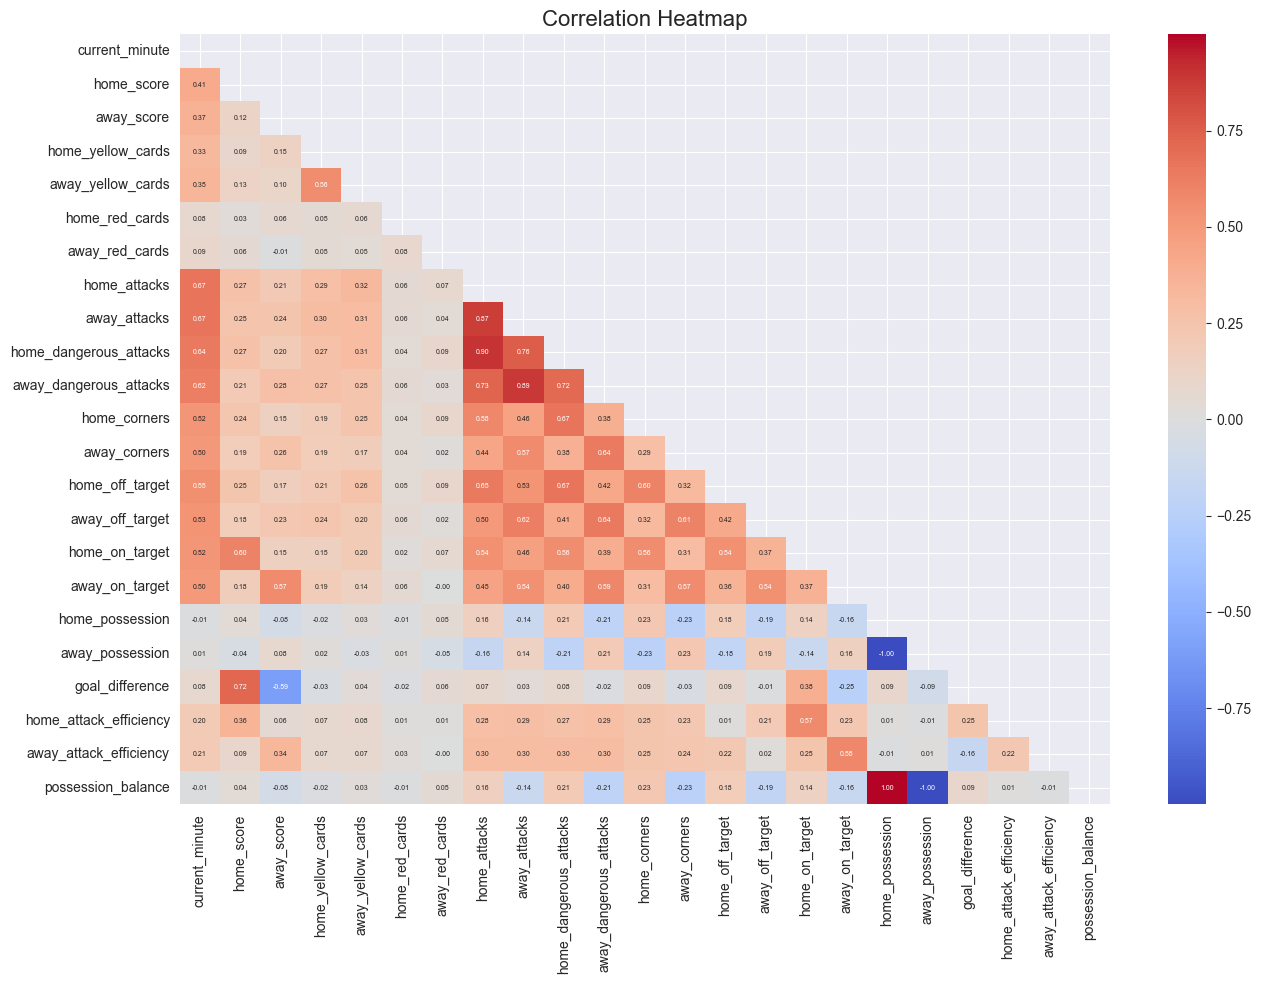

In [57]:
corr_matrix = df.drop('final_delta', axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, mask=mask, ax=ax, annot=True, annot_kws={'size': 5}, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### **Distribution of Target Feature**

We explore how our target variable, `final_delta`, is distributed across the dataset.

- **Insight**: Understanding the distribution helps identify common and rare values, informing potential adjustments in model focus.

The following pairs of features have high correlation with each other:
- home_attacks and home_dangerous_attacks (and the away equivalent) - positive 
- home_attacks and away_attacks - positive
- away_corners and possession_balance - negative
- away_corners and possession_balance - negative 

In general, the attack-related features have high positive correlations with each other (a sign we can generalize these as one feature?)

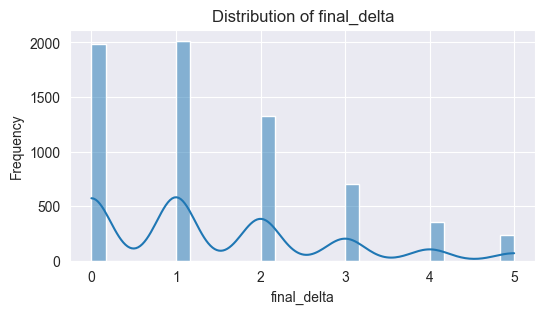

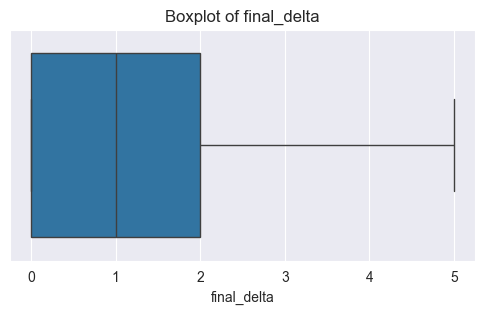

In [58]:
# Visualize distributions using histograms

numerical_cols = ['final_delta']

# Histogram plot
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Boxplot
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

### **Analysis of Attack-related Features Over Time**

This analysis examines how certain features evolve as a match progresses.

- **Insight**: This helps us spot patterns or consistent changes throughout the game, which can provide strategic insights into periods of higher activity or scoring opportunities.

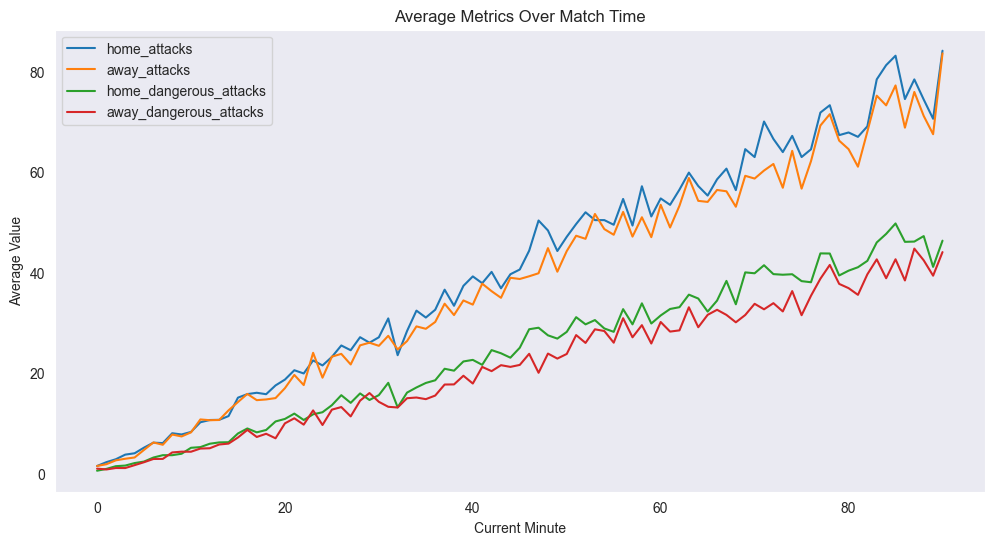

In [59]:
# Group by current_minute and calculate mean values for key metrics
time_analysis = df.groupby('current_minute').mean()
time_metrics = ['home_attacks', 'away_attacks', 'home_dangerous_attacks', 'away_dangerous_attacks']

plt.figure(figsize=(12, 6))
for metric in time_metrics:
    plt.plot(time_analysis.index, time_analysis[metric], label=metric)
plt.title("Average Metrics Over Match Time")
plt.xlabel("Current Minute")
plt.ylabel("Average Value")
plt.legend()
plt.grid()
plt.show()


---

# **Section 6: Machine Learning Model**



### **Model 1: Linear Regression (order=1)**

#### Initial Training of the Model
- We train a linear regression model to predict `final_delta` using our dataset. Linear regression is a simple model that assumes a straight-line relationship between features and the target.

In [60]:
X = df.drop("final_delta", axis=1)
y = df['final_delta']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X: (6621, 23)
Shape of y: (6621,)

Shape of X_train: (4634, 23)
Shape of X_test: (1987, 23)


In [61]:
# Preprocess LR Model by standardizing features
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Set up base model 
sgd = SGDRegressor(
    loss="squared_error", 
    penalty='l1', 
    learning_rate='constant',
    random_state=42,
    tol=0.0001, 
    verbose=True,
    )

sgd.fit(X_train_sc, y_train)

-- Epoch 1
Norm: 0.85, NNZs: 23, Bias: 1.422047, T: 4634, Avg. loss: 0.763624
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.44, NNZs: 20, Bias: 1.530925, T: 9268, Avg. loss: 0.749298
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.92, NNZs: 22, Bias: 1.296450, T: 13902, Avg. loss: 0.739412
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.38, NNZs: 22, Bias: 1.388114, T: 18536, Avg. loss: 0.736767
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.84, NNZs: 18, Bias: 1.229952, T: 23170, Avg. loss: 0.729075
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.37, NNZs: 22, Bias: 1.445988, T: 27804, Avg. loss: 0.729591
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.89, NNZs: 16, Bias: 1.353836, T: 32438, Avg. loss: 0.725527
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4.35, NNZs: 18, Bias: 1.417672, T: 37072, Avg. loss: 0.727491
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 4.80, NNZs: 17, Bias: 1.421035, T: 41706, Avg. loss: 0.718947
Total train

SGDRegressor(learning_rate='constant', penalty='l1', random_state=42,
             tol=0.0001, verbose=True)

In [62]:
weights = pd.DataFrame({
    'Feature': X_train.columns,
    'coef': sgd.coef_
})

weights = pd.concat(
    [weights, pd.DataFrame({'Feature': ['bias'], 
                            'coef':[sgd.intercept_]})],
    ignore_index=True
)

weights = weights.set_index('Feature')
weights

,coef
Feature,
current_minute,-0.722362
home_score,0.129671
away_score,0.0
home_yellow_cards,-0.061086
away_yellow_cards,0.0
home_red_cards,0.0
away_red_cards,-0.006204
home_attacks,0.01461
away_attacks,-0.070785


In [63]:
def ReLU(x):
    return x if x >= 0 else 0

In [64]:
# Get training score 
print("==On training set==\n")
tr_preds = sgd.predict(X_train_sc)
tr_preds = np.round(tr_preds)
tr_preds =  np.maximum(tr_preds, 0)


print(f"Range of predicted values: {np.unique(tr_preds)}" )
rmse = root_mean_squared_error(tr_preds, y_train)
mse = mean_squared_error(tr_preds, y_train)

print(f"RMSE: {rmse:.6f}")
print(f"MSE: {mse:.6f}")

# Get testing score 

print("\n==On test set==\n")
preds = sgd.predict(X_test_sc)
preds = np.round(preds)
preds = np.maximum(preds, 0)

print(f"Range of predicted values: {np.unique(preds)}" )
rmse = root_mean_squared_error(preds, y_test)
mse = mean_squared_error(preds, y_test)
r2 = r2_score(preds, y_test)


print(f"RMSE: {rmse:.6f}")
print(f"MSE: {mse:.6f}")
print(f"R2: {r2:.6f}")

==On training set==

Range of predicted values: [0. 1. 2. 3.]
RMSE: 1.215015
MSE: 1.476262

==On test set==

Range of predicted values: [0. 1. 2. 3.]
RMSE: 1.220526
MSE: 1.489683
R2: -1.119439


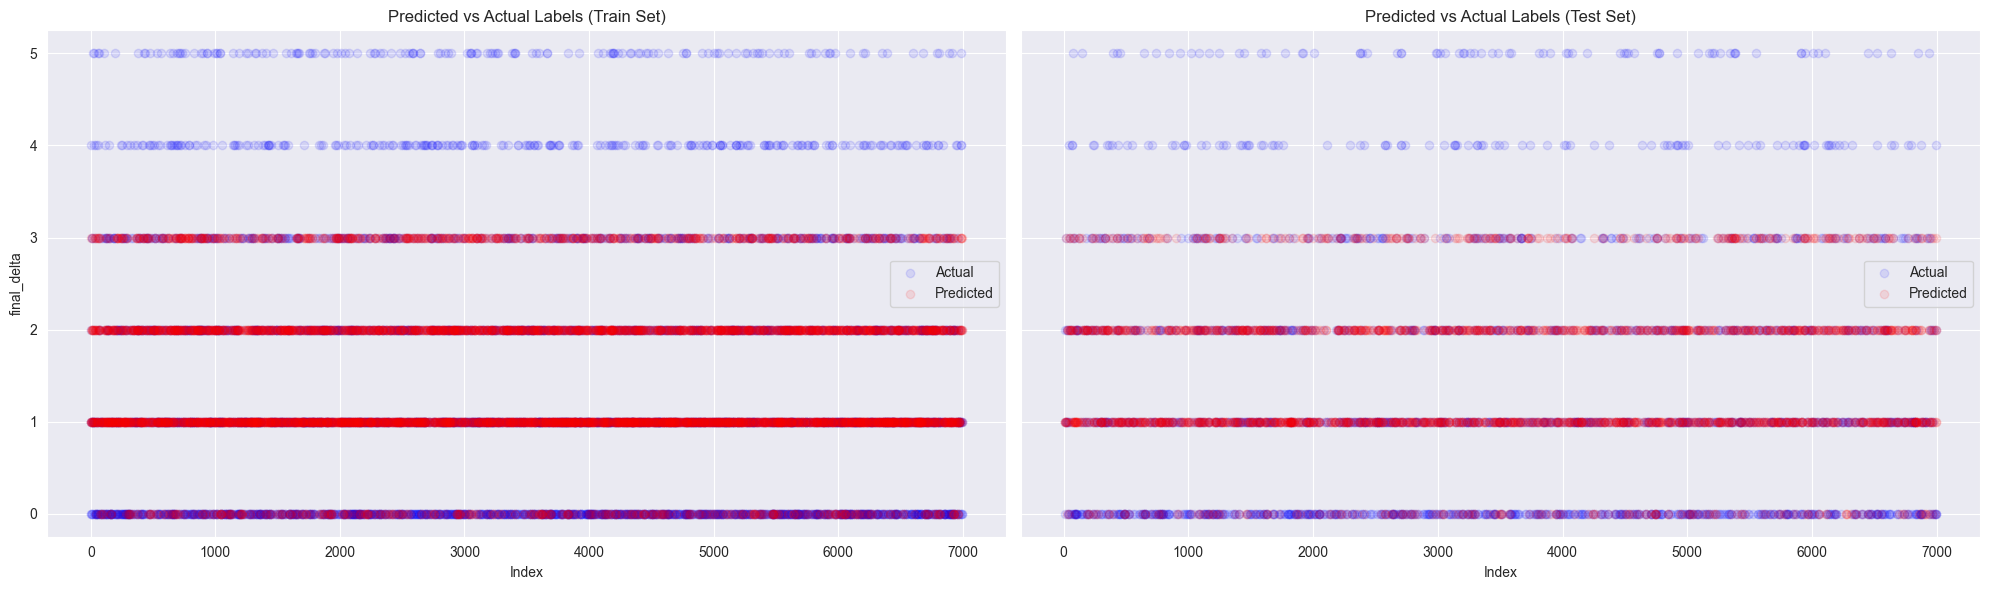

In [65]:
ig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Train set plot
axes[0].scatter(X_train.index, y_train, color='blue', label="Actual", alpha=0.1)
axes[0].scatter(X_train.index, tr_preds, color='red', label="Predicted", alpha=0.1)
axes[0].set_title("Predicted vs Actual Labels (Train Set)")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("final_delta")
axes[0].legend()

# Test set plot
axes[1].scatter(X_test.index, y_test, color='blue', label="Actual", alpha=0.1)
axes[1].scatter(X_test.index, preds, color='red', label="Predicted", alpha=0.1)
axes[1].set_title("Predicted vs Actual Labels (Test Set)")
axes[1].set_xlabel("Index")
axes[1].legend()

plt.tight_layout()
plt.show()

---

#### Error Analysis of the Chosen Model
- We examine how well the model predicts by calculating metrics like Mean Squared Error (MSE) or R-squared. These tell us the average error and how much of the variance in the target is explained by the model.
- [ADD YOUR SHIT HERE]

---

#### Improving The Model's Performance
- To enhance performance, consider adding polynomial features, optimizing feature selection, or using regularization techniques to reduce overfitting.

---
---

### **Model: Random Forest**
- We choose the Random Forest algorithm due to its robustness in handling complex datasets with minimal tuning necessity. It also naturally manages missing values and maintains performance.

#### Initial Training of the Model
- Random Forest is an ensemble model that uses multiple decision trees to make predictions. We train this model using our feature set to predict `final_delta`. The ensemble approach helps in reducing variance and improving accuracy.


In [66]:
X = df.drop("final_delta", axis=1)
y = df['final_delta']

df.head()   
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (6621, 23)
Shape of y: (6621,)


Split the data into training and testing sets

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (4634, 23)
Shape of X_test: (1987, 23)


Random Forest Regressor

In [68]:
# Create the random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, verbose=True, oob_score=True)

# Fit the model
rf_regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s


RandomForestRegressor(oob_score=True, random_state=42, verbose=True)

Evaluating om Training Data and Test Data

In [69]:
# Evaluate on training data
y_train_pred = rf_regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R²: {train_r2}")

# Evaluate on test data )
y_test_pred = rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Train MSE: 0.21722472602148948
Train RMSE: 0.46607373453294865
Train R²: 0.8774567575063826
Test MSE: 1.4514339030220906
Test RMSE: 1.2047547065781028
Test R²: 0.2227634054737544


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


---

#### Error Analysis of the Chosen Model
- **Performance Metrics**: [template discuss here the MSE< RMSE< R@ of each]
  - Evaluate using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. These metrics will show how accurately the model predicts goal differences.
  - Analyze the **Feature Importance** output, which indicates which features have the most influence on the predictions. This output helps in understanding the dynamics leading to scores.
  - Check the **Confusion Matrix** (if applicable for classification) to see where the model makes correct and incorrect predictions.

OOB since we dont want to splut the data further

In [70]:
#visualize the errors (from MSE, RMSE, R2)
# Print train MSE, RMSE, R²
print("Evaluating Training Data Results:")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R²: {train_r2}")
print("---------------------------------")

#will use OOB kasi validation set is not necessary since ensemble learning si RF
print("Evaluting Test Data Results:")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

#regressor
rf_regressor.fit(X_train, y_train)
oob_score = rf_regressor.oob_score_

# OOB Computation
oob_predictions = rf_regressor.oob_prediction_
oob_mse = mean_squared_error(y_train, oob_predictions)
oob_rmse = np.sqrt(oob_mse)
oob_r2 = r2_score(y_train, oob_predictions)
print("---------------------------------")
print("Evaluting Out-Of-Bag(OOB) Data Results:")
print(f"OOB MSE: {oob_mse}")
print(f"OOB RMSE: {oob_rmse}")
print(f"OOB R²: {oob_r2}")
print(f"\nOOB Score: {oob_score}")

#residual plot

#actual vs predicted plot

Evaluating Training Data Results:
Train MSE: 0.21722472602148948
Train RMSE: 0.46607373453294865
Train R²: 0.8774567575063826
---------------------------------
Evaluting Test Data Results:
Test MSE: 1.4514339030220906
Test RMSE: 1.2047547065781028
Test R²: 0.2227634054737544


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s


---------------------------------
Evaluting Out-Of-Bag(OOB) Data Results:
OOB MSE: 1.4257056104306727
OOB RMSE: 1.1940291497407727
OOB R²: 0.19571500195501235

OOB Score: 0.19571500195501235


Analyzing Feature Importances

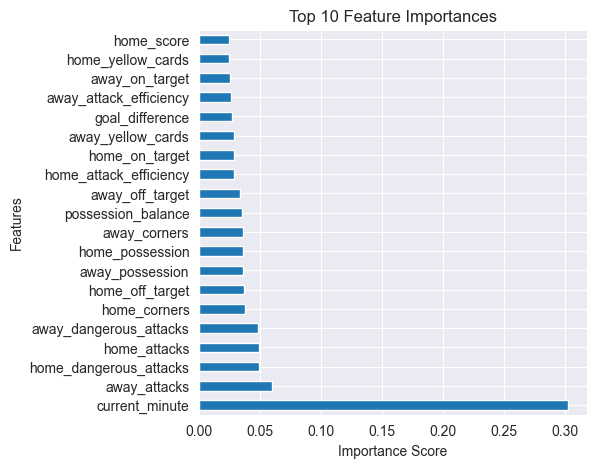

current_minute            0.302678
away_attacks              0.059488
home_dangerous_attacks    0.049440
home_attacks              0.049421
away_dangerous_attacks    0.048619
home_corners              0.037936
home_off_target           0.036548
away_possession           0.036210
home_possession           0.035849
away_corners              0.035637
possession_balance        0.035042
away_off_target           0.033119
home_attack_efficiency    0.028573
home_on_target            0.028504
away_yellow_cards         0.028267
goal_difference           0.026919
away_attack_efficiency    0.025745
away_on_target            0.025090
home_yellow_cards         0.024780
home_score                0.024301
away_score                0.023373
away_red_cards            0.002418
home_red_cards            0.002042
dtype: float64


In [71]:
#identify difficult to predict data points
#feature importance
plt.figure()
# Applying the ExtraTreesRegressor for feature importance
model = ExtraTreesRegressor()
model.fit(X, y)

# Extracting feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plotting the top 10 important features
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Displaying the feature importances for reference
print(feat_importances.sort_values(ascending=False))

Bias Variance Analysis? -- idk why but

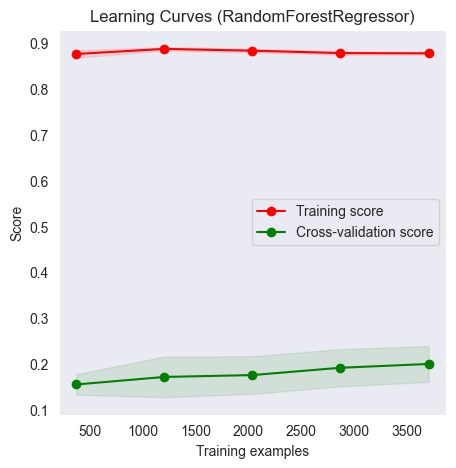

In [72]:
from random_forest_util import plot_learning_curve
# Initialize your model
rf_regressor = RandomForestRegressor(random_state=42)

# Plot learning curve for RandomForestRegressor
plot_learning_curve(rf_regressor, "Learning Curves (RandomForestRegressor)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

---

#### Improving The Model's Performance
- **Hyperparameter Tuning**:
  - Adjust parameters like the number of trees (`n_estimators`) and the maximum depth of trees to optimize the model's performance.
  - Use cross-validation strategies to ensure stable improvements.
- **Feature Engineering**:
  - Experiment with additional feature transformations or integrations that might capture data nuances better.
- **Data Management**:
  - Consider balancing the dataset or using resampling techniques if any feature imbalance emerges during error analysis.

Feature Engineering

Time-based Features

In [73]:
# Adjust for Halftime
df['normalized_time'] = df['current_minute'].apply(lambda x: x if x <= 45 else (x - 15 if x > 60 else 45))

# Create Time-Based Features
df['is_second_half'] = df['normalized_time'] > 45


Bin minutes

In [74]:
# # Bin the adjusted_minute into categories
# bins = [0, 15, 30, 45, 60, 75, 90]
# labels = ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90']
# df['binned_minute'] = pd.cut(df['current_minute'], bins=bins, labels=labels, right=False)

# # Display the first few rows to verify the new feature
# df[['current_minute', 'binned_minute']].head()

In [75]:
# Convert categorical features to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Display the first few rows to verify the changes
df.head()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,...,away_on_target,home_possession,away_possession,final_delta,goal_difference,home_attack_efficiency,away_attack_efficiency,possession_balance,normalized_time,is_second_half
0,79,1,2,0,0,0,0,39,45,29,...,6,48,52,1,-1,0.499999,0.999998,-4,64,True
1,76,2,0,0,0,0,0,0,0,0,...,0,50,50,1,2,0.000000,0.000000,0,61,True
2,3,0,0,0,0,0,0,3,1,1,...,0,62,38,4,0,0.000000,0.000000,24,3,False
3,17,0,0,1,0,0,0,41,46,11,...,0,55,45,2,0,0.000000,0.000000,10,17,False
4,61,1,0,1,0,0,0,69,78,21,...,4,45,55,0,1,0.999998,0.571428,-10,46,True


Interaction Features

In [76]:
# Feature Engineering: Interaction Features

# Calculate attack_ratio
df['attack_ratio'] = df['home_attacks'] / (df['away_attacks'] + 1e-5)

# Calculate possession_difference
df['possession_difference'] = df['home_possession'] - df['away_possession']

# Calculate score_difference
df['score_difference'] = df['home_score'] - df['away_score']

# Calculate time-based interaction features
df['time_home_attacks_interaction'] = df['normalized_time'] * df['home_attacks']
df['time_away_attacks_interaction'] = df['normalized_time'] * df['away_attacks']

# Additional Interaction Features
df['attack_ratio'] = df['home_attacks'] / (df['away_attacks'] + 1e-5)
df['score_difference'] = df['home_score'] - df['away_score']


Momentum Features

Categorical Features

In [77]:
# Feature Engineering: Convert meaningful numeric variables into categories

# Create a binary indicator for home advantage
df['home_advantage'] = (df['home_possession'] > df['away_possession']).astype(int)

# Display the first few rows to verify the new feature
df[['home_possession', 'away_possession', 'home_advantage']].head()
X = df.copy()
X = X.drop("final_delta", axis=1)
print(X.columns)


Index(['current_minute', 'home_score', 'away_score', 'home_yellow_cards',
       'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'home_attacks',
       'away_attacks', 'home_dangerous_attacks', 'away_dangerous_attacks',
       'home_corners', 'away_corners', 'home_off_target', 'away_off_target',
       'home_on_target', 'away_on_target', 'home_possession',
       'away_possession', 'goal_difference', 'home_attack_efficiency',
       'away_attack_efficiency', 'possession_balance', 'normalized_time',
       'is_second_half', 'attack_ratio', 'possession_difference',
       'score_difference', 'time_home_attacks_interaction',
       'time_away_attacks_interaction', 'home_advantage'],
      dtype='object')


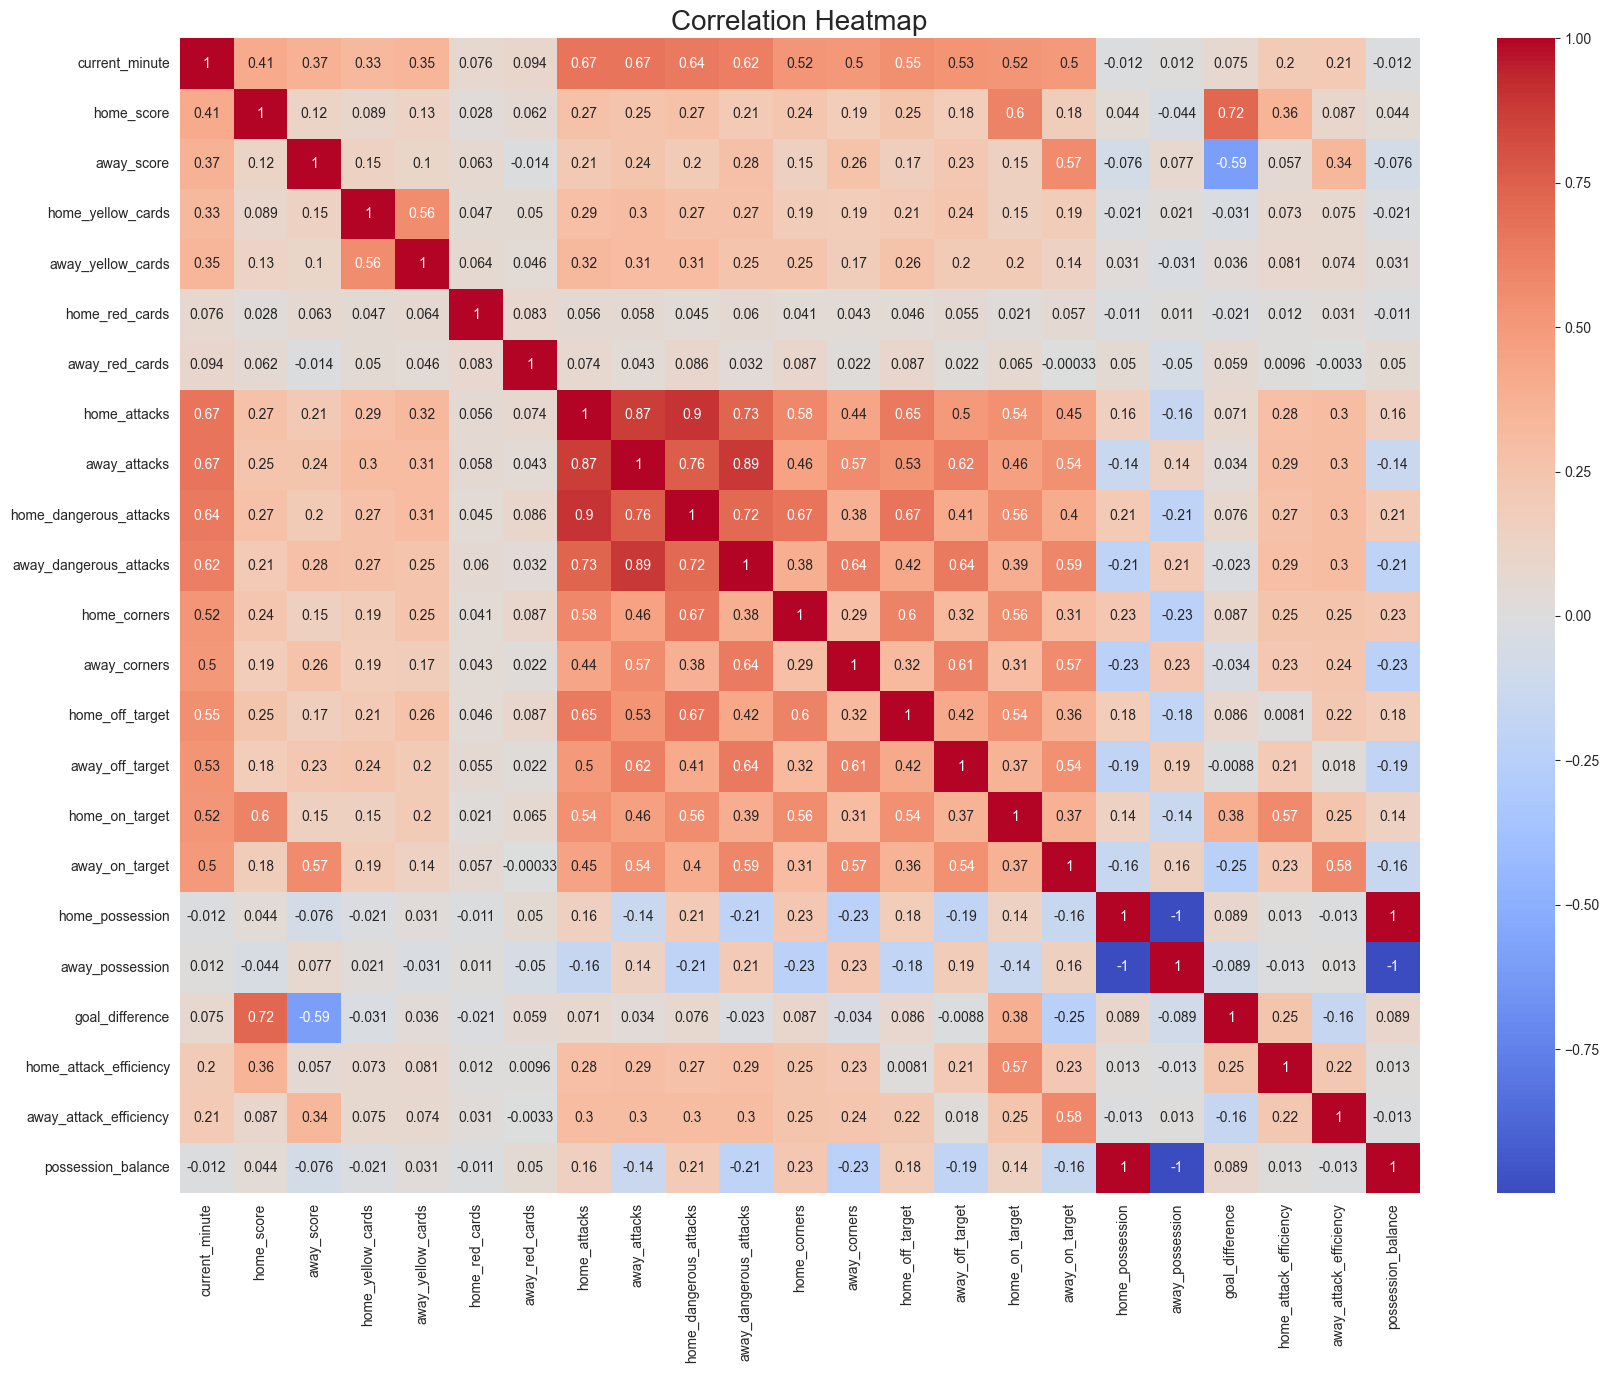

In [78]:
# Convert categorical features to numeric using one-hot encoding
# X_numeric = pd.get_dummies(X, drop_first=True)

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()


Drop Low Important Features

Shape of X after dropping low correlation features: (6621, 19)
Columns dropped due to low correlation: ['home_red_cards', 'away_red_cards', 'home_possession', 'away_possession', 'goal_difference', 'home_attack_efficiency', 'away_attack_efficiency', 'possession_balance', 'attack_ratio', 'possession_difference', 'score_difference', 'home_advantage']


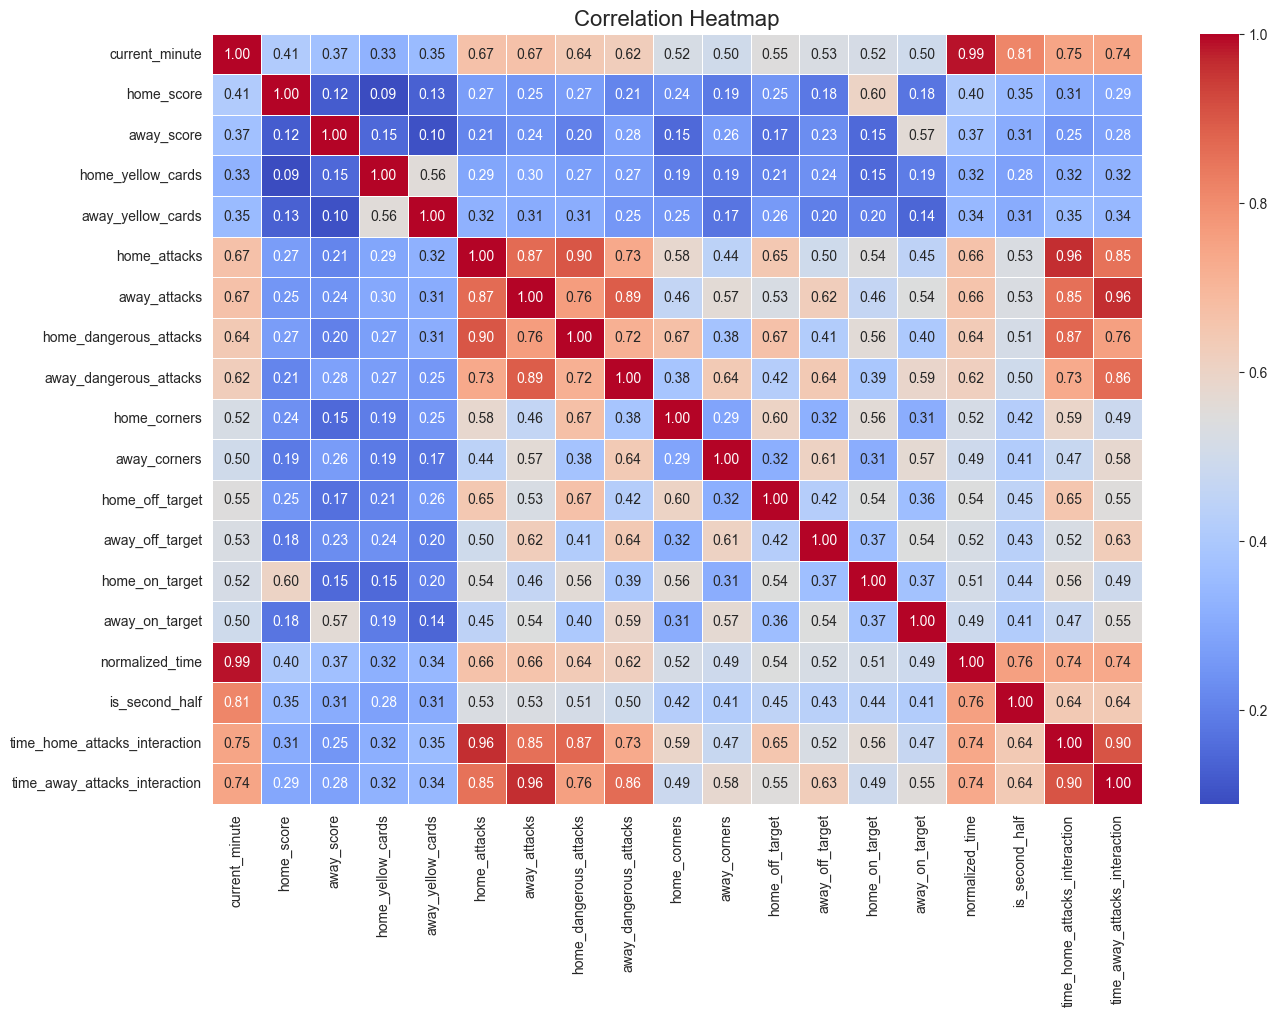

In [79]:
X['final_delta'] = y

correlations = X.corr()['final_delta'].drop('final_delta')

correlation_threshold = 0.1

# Identify features with low correlation
low_correlation_features = correlations[abs(correlations) < correlation_threshold].index.tolist()

#check in the data is in there
existing_features_to_drop = [feature for feature in low_correlation_features if feature in X.columns]

# Drop low correlation features
X = X.drop(columns=existing_features_to_drop)

# Drop 'final_delta' from the features
X= X.drop(columns=['final_delta'])

print(f"Shape of X after dropping low correlation features: {X.shape}")
print(f"Columns dropped due to low correlation: {existing_features_to_drop}")

# Improved correlation heatmap
plt.figure(figsize=(15, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [80]:
# Print all column headers
print(df.columns)
print(X.columns)
print(X.columns)

Index(['current_minute', 'home_score', 'away_score', 'home_yellow_cards',
       'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'home_attacks',
       'away_attacks', 'home_dangerous_attacks', 'away_dangerous_attacks',
       'home_corners', 'away_corners', 'home_off_target', 'away_off_target',
       'home_on_target', 'away_on_target', 'home_possession',
       'away_possession', 'final_delta', 'goal_difference',
       'home_attack_efficiency', 'away_attack_efficiency',
       'possession_balance', 'normalized_time', 'is_second_half',
       'attack_ratio', 'possession_difference', 'score_difference',
       'time_home_attacks_interaction', 'time_away_attacks_interaction',
       'home_advantage'],
      dtype='object')
Index(['current_minute', 'home_score', 'away_score', 'home_yellow_cards',
       'away_yellow_cards', 'home_attacks', 'away_attacks',
       'home_dangerous_attacks', 'away_dangerous_attacks', 'home_corners',
       'away_corners', 'home_off_target', 'away_o

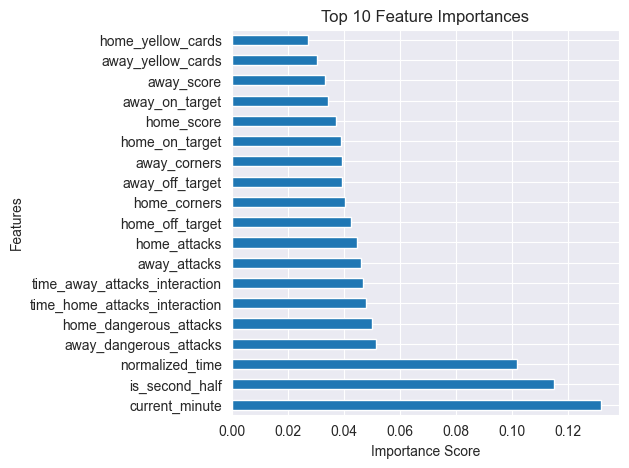

current_minute                   0.131807
is_second_half                   0.115266
normalized_time                  0.101860
away_dangerous_attacks           0.051520
home_dangerous_attacks           0.050138
time_home_attacks_interaction    0.047900
time_away_attacks_interaction    0.046796
away_attacks                     0.046169
home_attacks                     0.044594
home_off_target                  0.042747
home_corners                     0.040558
away_off_target                  0.039407
away_corners                     0.039334
home_on_target                   0.039139
home_score                       0.037118
away_on_target                   0.034316
away_score                       0.033430
away_yellow_cards                0.030622
home_yellow_cards                0.027279
dtype: float64


In [81]:
#identify difficult to predict data points
#feature importance
plt.figure()
# Applying the ExtraTreesRegressor for feature importance
model = ExtraTreesRegressor()
model.fit(X, y)

# Extracting feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plotting the top 10 important features
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Displaying the feature importances for reference
print(feat_importances.sort_values(ascending=False))

Retraining the model with the feature Engineered features (word better nyahaha)

In [82]:
# Update the feature set
X = df.drop("final_delta", axis=1)
y = df['final_delta']

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, verbose=True, oob_score=True)
rf_regressor.fit(X_train, y_train)

# Evaluate the model
y_train_pred = rf_regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R²: {train_r2}")
print("---------------------------------")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Shape of X: (6621, 31)
Shape of y: (6621,)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s


Train MSE: 0.21792227660690688
Train RMSE: 0.4668214611678718
Train R²: 0.8770632474667756
---------------------------------
Test MSE: 1.4536894377830822
Test RMSE: 1.2056904402802082
Test R²: 0.22155557633815381


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Feature Importances

In [83]:


# Feature importance
importances = rf_regressor.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feature_names = X.columns

print("Feature Importances:")
print("---------------------------------")

for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")
print("---------------------------------")


Feature Importances:
---------------------------------
current_minute: 0.2693204789779164
normalized_time: 0.06538021213730398
attack_ratio: 0.06128867364651245
time_home_attacks_interaction: 0.047944613819623526
time_away_attacks_interaction: 0.047317042666855505
away_dangerous_attacks: 0.04705122898849595
home_dangerous_attacks: 0.04519943436985658
away_attacks: 0.03486439099336779
home_attacks: 0.03298716210546149
home_attack_efficiency: 0.03100526125313557
away_attack_efficiency: 0.02748475400637986
home_corners: 0.024019808119000376
home_off_target: 0.02387200312499341
away_corners: 0.02332145392727944
away_off_target: 0.022751970257428252
home_possession: 0.019881142940958836
away_possession: 0.019776244331588807
possession_difference: 0.019767430926158375
possession_balance: 0.018764701107573376
home_on_target: 0.016238192303468055
away_yellow_cards: 0.015219927643389803
home_yellow_cards: 0.014613624924060875
goal_difference: 0.014390563821460825
score_difference: 0.01366249766

In [84]:
# Ensure feature_names corresponds to the training data
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame
print("---------------------------------")

# Fit the model
rf_regressor.fit(X_train, y_train)

# Get feature importances
importances = rf_regressor.feature_importances_

# Sort indices based on importances
sorted_indices = np.argsort(importances)[::-1]

# Display sorted feature importances
print("Feature Importances:")
print("---------------------------------")

for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")
print("---------------------------------")


---------------------------------


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s


Feature Importances:
---------------------------------
current_minute: 0.2693204789779164
normalized_time: 0.06538021213730398
attack_ratio: 0.06128867364651245
time_home_attacks_interaction: 0.047944613819623526
time_away_attacks_interaction: 0.047317042666855505
away_dangerous_attacks: 0.04705122898849595
home_dangerous_attacks: 0.04519943436985658
away_attacks: 0.03486439099336779
home_attacks: 0.03298716210546149
home_attack_efficiency: 0.03100526125313557
away_attack_efficiency: 0.02748475400637986
home_corners: 0.024019808119000376
home_off_target: 0.02387200312499341
away_corners: 0.02332145392727944
away_off_target: 0.022751970257428252
home_possession: 0.019881142940958836
away_possession: 0.019776244331588807
possession_difference: 0.019767430926158375
possession_balance: 0.018764701107573376
home_on_target: 0.016238192303468055
away_yellow_cards: 0.015219927643389803
home_yellow_cards: 0.014613624924060875
goal_difference: 0.014390563821460825
score_difference: 0.01366249766

Hyperparameter Tuning (using Exhaustive Search)

In [85]:
best_rf_model = tune_random_forest(X_train, y_train, X_test, y_test)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'bootstrap': True, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (CV): 0.25012696354162356
Best Estimator: RandomForestRegressor(max_depth=3, min_samples_leaf=2, random_state=42)
Test MSE (Best Model): 1.3635937768535291
Test RMSE (Best Model): 1.167730181528905
Test R² (Best Model): 0.2698014141518317


---
---

# **Section 11: References**



> Dump Ref muna fix it later

https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2019.00501/full

https://www.sciencedirect.com/science/article/abs/pii/S0169207018300116

https://warin.ca/ressources/books/2013_Book_AppliedPredictiveModeling.pdf

https://ieeexplore.ieee.org/document/4160265

https://www.researchgate.net/publication/265194455_pandas_a_Foundational_Python_Library_for_Data_Analysis_and_Statistics

https://web.mit.edu/dvp/Public/numpybook.pdf

https://dl.acm.org/doi/10.5555/1953048.2078195

https://www.researchgate.net/publication/350701622_seaborn_statistical_data_visualization

https://www.sciencedirect.com/book/9780123814791/data-mining-concepts-and-techniques

https://archive.org/details/exploratorydataa0000tuke_7616

---

- Anguera, M. T., Blanco-Villaseñor, A., Losada, J. L., & Perea, M. V. (2018). Sports analysis and prediction: New challenges and approaches. Frontiers in Psychology, 10, 501. https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2019.00501/full

- Yin, D., & Leong, S. Y. (2017). Predictive modeling in soccer analytics. International Journal of Sports Management and Marketing, 7(3), 235-248. https://www.sciencedirect.com/science/article/abs/pii/S0169207018300116

- Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. Springer Science & Business Media. https://warin.ca/ressources/books/2013_Book_AppliedPredictiveModeling.pdf

- Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. https://ieeexplore.ieee.org/document/4160265

- McKinney, W. (2011). pandas: A foundational Python library for data analysis and manipulation. Python for Data Analysis, O'Reilly Media. https://www.researchgate.net/publication/265194455_pandas_a_Foundational_Python_Library_for_Data_Analysis_and_Statistics

- Oliphant, T. E. (2006). A guide to NumPy. Trelgol Publishing. https://web.mit.edu/dvp/Public/numpybook.pdf

- Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. https://dl.acm.org/doi/10.5555/1953048.2078195

- Waskom, M. L. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://www.researchgate.net/publication/350701622_seaborn_statistical_data_visualization

- Han, J., Kamber, M., & Pei, J. (2011). Data mining: Concepts and techniques. Elsevier. https://www.sciencedirect.com/book/9780123814791/data-mining-concepts-and-techniques

- Tukey, J. W. (1977). Exploratory data analysis. Addison-Wesley. https://archive.org/details/exploratorydataa0000tuke_7616